In [107]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score

# Import the dataset
df1 = pd.read_csv("diabetes_dirty.csv", index_col=0)
df1.head()

,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
AGE,,,,,,,,,,
59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [108]:
# Resetting the dataset to include Pregnancies as a feature variable
df = df1.reset_index()
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


<Axes: >

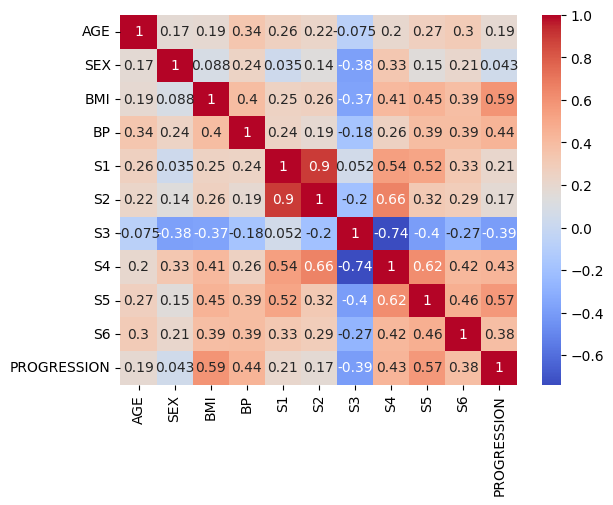

In [110]:
# For heatmap
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

With the target varaiable as Progression, this heatmap indicates that Age, Sex, S1, & S2 have little correlation. This is because they are shaded with minimal intensity, & their numerical values are between 0.25 and -0.25.

Consequently, the other 6 varaiables can be designated dependent variables.

In [111]:
'''sns.pairplot(df, hue ='SEX')
plt.show()'''

"sns.pairplot(df, hue ='SEX')\nplt.show()"

The Progression row in this pairplot indicates that some variables have greater liner correlation than others. It indicates that S5 & S6 have the strongest linear correlation. This also shows that Age, S1, & S2 have little or no correlation to Progression. 

ANSWER Q1: 

Y DEPENDENT VARIABLE = Progression

X INDEPENDENT VARIABLES = Sex, BMI, BP, S3, S4, S5, S6.

In [112]:
# to drop columns not required
df_new = df.drop(columns =['AGE', 'S1', 'S2'])
df_new.head()

,SEX,BMI,BP,S3,S4,S5,S6,PROGRESSION
0,2,32.1,101.0,38.0,4.0,4.8598,87,151
1,1,21.6,87.0,70.0,3.0,3.8918,69,75
2,2,30.5,93.0,41.0,4.0,4.6728,85,141
3,1,25.3,84.0,40.0,5.0,4.8903,89,206
4,1,23.0,101.0,52.0,4.0,4.2905,80,135


In [113]:
# Defining feature & target variables
y = df_new['PROGRESSION']
X = df_new.drop(columns= 'PROGRESSION')

In [114]:
y.shape

(442,)

In [115]:
X.shape

(442, 7)

In [116]:

# Split data into training and test sets of 80% & 20% 
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed)

print("ANSWER Q2: Training & test set data, with an 80% / 20% split")
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

ANSWER Q2: Training & test set data, with an 80% / 20% split
Training data: (353, 7) (353,)
Test data: (89, 7) (89,)


ANSWER Q3:

Looking at the distribution of variables in the pairplots, most are non-Normal.
Consequently, MinMaxScaler will be used & fitted onto the training data.

In [117]:
# I need to scale data & reshape
scaler = MinMaxScaler()
# fit
scaler.fit(y_train.values.reshape(-1, 1))
y_train = scaler.transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

In [118]:
# multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [119]:
# Coefficients & Intercepts
print("ANSWER Q4: The intercepts, & coefficients")
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


ANSWER Q4: The intercepts, & coefficients
Intercept: 
 [-0.81829875]
Coefficients: 
 [[-0.08271863  0.01740585  0.00331493 -0.00388463 -0.00874257  0.14924941
   0.00093691]]


In [120]:
# Generating predictions
y_pred = model.predict(X_test)   # defining the predictions set

X_test[0:5]                      # checking a sample of test data


,SEX,BMI,BP,S3,S4,S5,S6
114,1,36.6,113.0,43.0,4.63,5.7301,97
261,1,22.5,125.0,98.0,2.00,4.4998,95
193,2,25.9,76.0,39.0,6.00,5.0752,96
110,2,23.4,88.0,58.0,3.00,3.2581,95
357,2,31.0,100.0,45.0,4.00,5.1874,77


In [121]:
# displaying corresponding predictions
print("ANSWER Q5: The predictions")
y_pred[0:5]

ANSWER Q5: The predictions


array([[0.84920191],
       [0.26740159],
       [0.36246893],
       [0.03901526],
       [0.52391899]])

In [122]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.4647
